## Introdução à Análise Preditiva: o afundamento do Titanic

https://www.kaggle.com/c/titanic-gettingStarted

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

#### Vamos carregar as baterias para nossa análise...

In [1]:
import os
import sys
import pickle
import pandas as pd
import numpy as np
import pylab
import statsmodels.api as sm
#from statsmodels import api as smf
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
#import seaborn as sns
import seaborn.apionly as sns
%matplotlib inline
#%pylab inline

Carregando o dataset:

In [2]:
datapath = "/home/rsouza/Dropbox/Renato/ModMinDados/Git/datasets/"
outputs = "/home/rsouza/Dropbox/Renato/ModMinDados/outputs/"

In [3]:
df_train = pd.read_csv(os.path.join(datapath,'Kaggle/kaggle_titanic_train.csv'))
df_test = pd.read_csv(os.path.join(datapath,'Kaggle/kaggle_titanic_test.csv'))

In [4]:
#df_train.columns
#df_train.dtypes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print(sorted(df_train.Survived.unique()))
print(sorted(df_train.Pclass.unique()))
print(sorted(df_train.SibSp.unique()))
print(sorted(df_train.Embarked.unique()))

[0, 1]
[1, 2, 3]
[0, 1, 2, 3, 4, 5, 8]
[nan, 'C', 'Q', 'S']


In [8]:
df_by_sex = df_train.groupby('Sex')
df_by_sex.describe()

Age        Fare       Parch  PassengerId      Pclass  \
Sex                                                                         
female count  261.000000  314.000000  314.000000   314.000000  314.000000   
       mean    27.915709   44.479818    0.649682   431.028662    2.159236   
       std     14.110146   57.997698    1.022846   256.846324    0.857290   
       min      0.750000    6.750000    0.000000     2.000000    1.000000   
       25%     18.000000   12.071875    0.000000   231.750000    1.000000   
       50%     27.000000   23.000000    0.000000   414.500000    2.000000   
       75%     37.000000   55.000000    1.000000   641.250000    3.000000   
       max     63.000000  512.329200    6.000000   889.000000    3.000000   
male   count  453.000000  577.000000  577.000000   577.000000  577.000000   
       mean    30.726645   25.523893    0.235702   454.147314    2.389948   
       std     14.678201   43.138263    0.612294   257.486139    0.813580   
       min      0.420000    0.000000    0.000000     1.000000    1.000000   
       25%     21.000000    7.895800    0.000000   222.000000    2.000000   
       50%     29.000000   10.500000    0.000000   464.000000    3.000000   
       75%     39.000000   26.550000    0.000000   680.000000    3.000000   
       max     80.000000  512.329200    5.000000   891.000000    3.000000   

                   SibSp    Survived  
Sex                                   
female count  314.000000  314.000000  
       mean     0.694268    0.742038  
       std      1.156520    0.438211  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    1.000000  
       75%      1.000000    1.000000  
       max      8.000000    1.000000  
male   count  577.000000  577.000000  
       mean     0.429809    0.188908  
       std      1.061811    0.391775  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      0.000000    0.000000  
       max      8.000000    1.000000

In [9]:
df_train['Gender'] = df_train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df_train['Embarked'] = df_train['Embarked'].map( {np.nan:0,'C':1, 'Q':2,'S':3} ).astype(int)
df_test['Gender'] = df_test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df_test['Embarked'] = df_test['Embarked'].map( {np.nan:0,'C':1, 'Q':2,'S':3} ).astype(int)

In [10]:
df_by_class = df_train.groupby('Pclass')
df_by_class.describe()

Age    Embarked        Fare      Gender       Parch  \
Pclass                                                                     
1      count  186.000000  216.000000  216.000000  216.000000  216.000000   
       mean    38.233441    2.175926   84.154687    0.564815    0.356481   
       std     14.802856    0.996073   78.380373    0.496933    0.693997   
       min      0.920000    0.000000    0.000000    0.000000    0.000000   
       25%     27.000000    1.000000   30.923950    0.000000    0.000000   
       50%     37.000000    3.000000   60.287500    1.000000    0.000000   
       75%     49.000000    3.000000   93.500000    1.000000    0.000000   
       max     80.000000    3.000000  512.329200    1.000000    4.000000   
2      count  173.000000  184.000000  184.000000  184.000000  184.000000   
       mean    29.877630    2.798913   20.662183    0.586957    0.380435   
       std     14.001077    0.589340   13.417399    0.493724    0.690963   
       min      0.670000    1.000000    0.000000    0.000000    0.000000   
       25%     23.000000    3.000000   13.000000    0.000000    0.000000   
       50%     29.000000    3.000000   14.250000    1.000000    0.000000   
       75%     36.000000    3.000000   26.000000    1.000000    1.000000   
       max     70.000000    3.000000   73.500000    1.000000    3.000000   
3      count  355.000000  491.000000  491.000000  491.000000  491.000000   
       mean    25.140620    2.584521   13.675550    0.706721    0.393075   
       std     12.495398    0.716058   11.778142    0.455730    0.888861   
       min      0.420000    1.000000    0.000000    0.000000    0.000000   
       25%     18.000000    2.000000    7.750000    0.000000    0.000000   
       50%     24.000000    3.000000    8.050000    1.000000    0.000000   
       75%     32.000000    3.000000   15.500000    1.000000    0.000000   
       max     74.000000    3.000000   69.550000    1.000000    6.000000   

              PassengerId       SibSp    Survived  
Pclass                                             
1      count   216.000000  216.000000  216.000000  
       mean    461.597222    0.416667    0.629630  
       std     246.737616    0.611898    0.484026  
       min       2.000000    0.000000    0.000000  
       25%     270.750000    0.000000    0.000000  
       50%     472.000000    0.000000    1.000000  
       75%     670.500000    1.000000    1.000000  
       max     890.000000    3.000000    1.000000  
2      count   184.000000  184.000000  184.000000  
       mean    445.956522    0.402174    0.472826  
       std     250.852161    0.601633    0.500623  
       min      10.000000    0.000000    0.000000  
       25%     234.500000    0.000000    0.000000  
       50%     435.500000    0.000000    0.000000  
       75%     668.000000    1.000000    1.000000  
       max     887.000000    3.000000    1.000000  
3      count   491.000000  491.000000  491.000000  
       mean    439.154786    0.615071    0.242363  
       std     264.441453    1.374883    0.428949  
       min       1.000000    0.000000    0.000000  
       25%     200.000000    0.000000    0.000000  
       50%     432.000000    0.000000    0.000000  
       75%     666.500000    1.000000    0.000000  
       max     891.000000    8.000000    1.000000

In [11]:
df_train[df_train['Age'] > 60][['Sex', 'Pclass', 'Age', 'Survived']].describe()
#df_train[df_train['Age'].isnull()][['Sex', 'Pclass', 'Age']]

,Pclass,Age,Survived
count,22.000000,22.000000,22.000000
mean,1.590909,66.022727,0.227273
std,0.854071,5.024884,0.428932
min,1.000000,61.000000,0.000000
25%,1.000000,62.000000,0.000000
50%,1.000000,64.500000,0.000000
75%,2.000000,70.000000,0.000000
max,3.000000,80.000000,1.000000


In [12]:
for i in range(1,4):
    print i, len(df_train[ (df_train['Sex'] == 'male') & (df_train['Pclass'] == i) ])

1 122
2 108
3 347


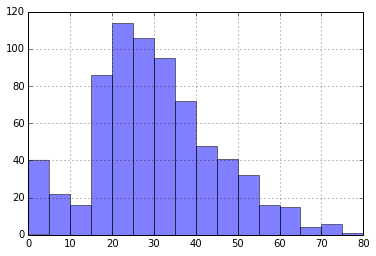

In [13]:
#df_train['Age'].hist()
df_train['Age'].dropna().hist(bins=16, range=(0,80), alpha = .5)

In [14]:
df_train['AgeFill'] = df_train['Age']
df_test['AgeFill'] = df_test['Age']

In [15]:
df_train[df_train['Age'].isnull()][['Gender','Pclass','Age','AgeFill']].head(4)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN


In [16]:
len(df_train[df_train['Age'].isnull()])

177

In [17]:
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df_train[(df_train['Gender'] == i) & (df_train['Pclass'] == j+1)]['Age'].dropna().median()
median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [18]:
for i in range(0, 2):
    for j in range(0, 3):
        df_train.loc[(df_train.Age.isnull()) & (df_train.Gender == i) & (df_train.Pclass == j+1),'AgeFill'] = median_ages[i,j]
        df_test.loc[(df_test.Age.isnull()) & (df_test.Gender == i) & (df_test.Pclass == j+1),'AgeFill'] = median_ages[i,j]

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
Gender         891 non-null int64
AgeFill        891 non-null float64
dtypes: float64(3), int64(7), object(4)
memory usage: 104.4+ KB


In [20]:
df_train.dtypes[df_train.dtypes.map(lambda x: x=='object')]

Name      object
Sex       object
Ticket    object
Cabin     object
dtype: object

In [21]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train['Age*Class'] = df_train.AgeFill * df_train.Pclass
df_train2 = df_train.drop(['Age','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_train2 = df_train2.dropna()
df_train2.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Gender,AgeFill,FamilySize,Age*Class
0,1,0,3,1,0,7.2500,1,22,1,66
1,2,1,1,1,0,71.2833,0,38,1,38
2,3,1,3,0,0,7.9250,0,26,0,78
3,4,1,1,1,0,53.1000,0,35,1,35
4,5,0,3,0,0,8.0500,1,35,0,105


In [22]:
train_data = df_train2.values
print(train_data.shape)
train_data

(891, 10)


array([[   1. ,    0. ,    3. , ...,   22. ,    1. ,   66. ],
       [   2. ,    1. ,    1. , ...,   38. ,    1. ,   38. ],
       [   3. ,    1. ,    3. , ...,   26. ,    0. ,   78. ],
       ..., 
       [ 889. ,    0. ,    3. , ...,   21.5,    3. ,   64.5],
       [ 890. ,    1. ,    1. , ...,   26. ,    0. ,   26. ],
       [ 891. ,    0. ,    3. , ...,   32. ,    0. ,   96. ]])

In [23]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']
df_test['Age*Class'] = df_test.AgeFill * df_test.Pclass
df_test2 = df_test.drop(['Age','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_test2 = df_test2.dropna()
df_test2.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Gender,AgeFill,FamilySize,Age*Class
0,892,3,0,0,7.8292,1,34.5,0,103.5
1,893,3,1,0,7.0000,0,47.0,1,141.0
2,894,2,0,0,9.6875,1,62.0,0,124.0
3,895,3,0,0,8.6625,1,27.0,0,81.0
4,896,3,1,1,12.2875,0,22.0,2,66.0


In [24]:
test_data = df_test2.values
print(test_data.shape)
test_data

(417, 9)


array([[  8.92000000e+02,   3.00000000e+00,   0.00000000e+00, ...,
          3.45000000e+01,   0.00000000e+00,   1.03500000e+02],
       [  8.93000000e+02,   3.00000000e+00,   1.00000000e+00, ...,
          4.70000000e+01,   1.00000000e+00,   1.41000000e+02],
       [  8.94000000e+02,   2.00000000e+00,   0.00000000e+00, ...,
          6.20000000e+01,   0.00000000e+00,   1.24000000e+02],
       ..., 
       [  1.30700000e+03,   3.00000000e+00,   0.00000000e+00, ...,
          3.85000000e+01,   0.00000000e+00,   1.15500000e+02],
       [  1.30800000e+03,   3.00000000e+00,   0.00000000e+00, ...,
          2.50000000e+01,   0.00000000e+00,   7.50000000e+01],
       [  1.30900000e+03,   3.00000000e+00,   1.00000000e+00, ...,
          2.50000000e+01,   2.00000000e+00,   7.50000000e+01]])

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
Adjusting features scales:  

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(train_data[0::,2::])
y_train = train_data[0::,1]
X_test = scaler.fit_transform(test_data[0::,1::])

http://stats.stackexchange.com/questions/95797/how-to-split-the-dataset-for-cross-validation-learning-curve-and-final-evaluat  
http://scikit-learn.org/stable/modules/cross_validation.html  

In [26]:
from sklearn import cross_validation

Creating cross-validation with subsets (60% train / 40% test):  

In [27]:
X_traincv, X_testcv, y_traincv, y_testcv = cross_validation.train_test_split(X_train, 
                                                                             y_train, 
                                                                             test_size=0.4, 
                                                                             random_state=0)

Creating another train/test set using k-fold or other cross-validation method:  
http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html  
http://www.analyticsvidhya.com/blog/2015/05/k-fold-cross-validation-simple/  
http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html  
http://stackoverflow.com/questions/25375203/identical-learning-curves-on-subsequent-runs-using-shufflesplit  
http://stackoverflow.com/questions/28064634/random-state-pseudo-random-numberin-scikit-learn  

In [28]:
cv = cross_validation.KFold(len(X_train), n_folds=10)
#cv = cross_validation.ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2, random_state=0)

def mean_scores_cv(clf, cv, X, y):
    scores = cross_validation.cross_val_score(clf, X, y, 
                                              scoring=None, 
                                              cv=cv, 
                                              n_jobs=-1,
                                              verbose=0,
                                              fit_params=None,
                                              pre_dispatch='2*n_jobs')
    return scores.mean()

In [29]:
#Example on how to choose the best parameters using GridSearchCV
#http://scikit-learn.org/0.11/tutorial/statistical_inference/model_selection.html
#http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html
from sklearn.grid_search import GridSearchCV

In [30]:
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm
'''
estimator = svm.SVC()
kernels = ['linear', 'poly']
Cs = np.linspace(0.1,2,10)
degrees = [2,3,4]
gammas = np.logspace(-5, 0, 10)

clf1 = GridSearchCV(estimator=estimator, 
                   cv=cv, 
                   param_grid=dict(kernel=kernels, C=Cs, gamma=gammas, degree=degrees)).fit(X_train, y_train)

with open(os.path.join(outputs,'best_parameters_svm.pickle'), 'w') as f:
    pickle.dump(clf1,f)
'''
with open(os.path.join(outputs,'best_parameters_svm.pickle'), 'r') as f:
    clf1 = pickle.load(f)

print(clf1.best_score_)
print(clf1.best_estimator_.kernel)
print(clf1.best_estimator_.C)
print(clf1.best_estimator_.degree)
print(clf1.best_estimator_.gamma)

0.821548821549
poly
1.57777777778
2
0.278255940221


Testing some classifiers:  
Note that only the first classifier (svm) had its parameters optimized  

In [31]:
clf1b = svm.SVC(kernel=clf1.best_estimator_.kernel,
               C=clf1.best_estimator_.C,
               degree=clf1.best_estimator_.degree, 
               gamma=clf1.best_estimator_.gamma, 
               coef0=0.0, 
               shrinking=True, 
               probability=False, 
               tol=0.001, 
               cache_size=200, 
               class_weight=None, 
               verbose=False, 
               max_iter=-1, 
               random_state=None).fit(X_traincv, y_traincv)

eval1_tts = clf1b.score(X_testcv, y_testcv)
print(eval1_tts)

eval1_cv = mean_scores_cv(clf1b, cv, X_train, y_train)
print(eval1_cv)

0.803921568627
0.821573033708


For this first classifier, we'll also display the learning curve  
http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.learning_curve.html  

In [32]:
#http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.learning_curve.html
from sklearn.learning_curve import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X, y, cv=cv, 
                                                            n_jobs=n_jobs, 
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

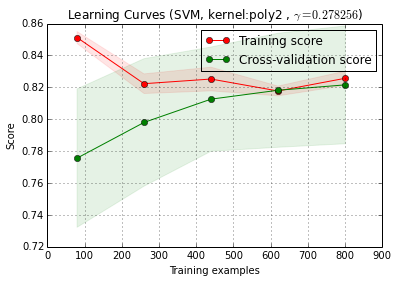

In [54]:
title = 'Learning Curves (SVM, kernel:{1}{0} , $\gamma={2:.6f}$)'.format(clf1.best_estimator_.degree,
                                                                         clf1.best_estimator_.kernel,
                                                                         clf1.best_estimator_.gamma)
graph = plot_learning_curve(clf1b, title, X_train, y_train, cv=cv)
#matplotlib.rcdefaults()
#matplotlib.verbose.set_level('silent')
graph.show()

In [34]:
#http://scikit-learn.org/stable/modules/ensemble.html
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#http://blog.yhathq.com/posts/random-forests-in-python.html
#http://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/
from sklearn.ensemble import RandomForestClassifier

In [35]:
clf2 = RandomForestClassifier(n_estimators=100, 
                              criterion='gini', 
                              max_depth=None, 
                              min_samples_split=2, 
                              min_samples_leaf=1, 
                              min_weight_fraction_leaf=0.0, 
                              max_features='auto', 
                              max_leaf_nodes=None, 
                              bootstrap=True, 
                              oob_score=False, 
                              n_jobs=1, 
                              random_state=None, 
                              verbose=0, 
                              warm_start=False, 
                              class_weight=None).fit(X_traincv, y_traincv)



eval2_tts = clf2.score(X_testcv, y_testcv)
print(eval2_tts)

eval2_cv = mean_scores_cv(clf2, cv, X_train, y_train)
print(eval2_cv)

0.795518207283
0.808152309613


In [36]:
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier(max_depth=None, 
                              min_samples_split=1,
                              random_state=0).fit(X_traincv, y_traincv)

eval3_tts = clf3.score(X_testcv, y_testcv)
print(eval3_tts)

eval3_cv = mean_scores_cv(clf3, cv, X_train, y_train)
print(eval3_cv)

0.775910364146
0.787940074906


In [37]:
from sklearn.ensemble import ExtraTreesClassifier
clf4 = ExtraTreesClassifier(n_estimators=10,
                            max_depth=None,
                            min_samples_split=1,
                            random_state=0).fit(X_traincv, y_traincv)

eval4_tts = clf4.score(X_testcv, y_testcv)
print(eval4_tts)

eval4_cv = mean_scores_cv(clf4, cv, X_train, y_train)
print(eval4_cv)

0.787114845938
0.786828963795


In [38]:
from sklearn.ensemble import AdaBoostClassifier
clf5 = AdaBoostClassifier(base_estimator=None,
                          n_estimators=50,
                          learning_rate=1.0,
                          algorithm='SAMME.R',
                          random_state=None).fit(X_traincv, y_traincv)

eval5_tts = clf5.score(X_testcv, y_testcv)
print(eval5_tts)

eval5_cv = mean_scores_cv(clf5, cv, X_train, y_train)
print(eval5_cv)

0.812324929972
0.814831460674


In [39]:
#http://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import GaussianNB

In [40]:
clf6 = GaussianNB().fit(X_traincv, y_traincv)

eval6_tts = clf6.score(X_testcv, y_testcv)
print(eval6_tts)

eval6_cv = mean_scores_cv(clf6, cv, X_train, y_train)
print(eval6_cv)

0.78431372549
0.780062421973


In [41]:
#https://pythonhosted.org/nolearn/dbn.html#module-nolearn.dbn
#https://pythonhosted.org/nolearn/dbn.html?highlight=lasagne
#http://www.pyimagesearch.com/2014/10/13/deep-learning-amazon-ec2-gpu-python-nolearn/  
from nolearn.dbn import DBN

gnumpy: failed to import cudamat. Using npmat instead. No GPU will be used.


/usr/local/lib/python2.7/dist-packages/nolearn/dbn.py:17: UserWarning: 
The nolearn.dbn module will be removed in nolearn 0.6.  If you want to
continue to use this module, please consider copying the code into
your own project.  And take a look at Lasagne and nolearn.lasagne for
a better neural net toolkit.

  """)


In [42]:
clf7 = DBN([-1, 1000, -1], 
           learn_rates=0.01, 
           learn_rates_pretrain=0.005, 
           learn_rate_decays=1, 
           epochs=30, 
           verbose=0,)

clf7.fit(X_traincv, y_traincv)

eval7_tts = clf7.score(X_testcv, y_testcv)
print(eval7_tts)

eval7_cv = mean_scores_cv(clf7, cv, X_train, y_train)
print(eval7_cv)

0.81512605042
0.820449438202


In [43]:
#http://lasagne.readthedocs.org/en/latest/
#https://github.com/Lasagne
#https://github.com/dnouri/nolearn/blob/master/nolearn/lasagne/base.py
#http://nbviewer.ipython.org/github/ottogroup/kaggle/blob/master/Otto_Group_Competition.ipynb
#http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/
from lasagne.layers import DenseLayer
from lasagne.layers import InputLayer
from lasagne.layers import DropoutLayer
from lasagne.nonlinearities import softmax
from lasagne.updates import nesterov_momentum
from lasagne.updates import adagrad
from nolearn.lasagne import NeuralNet

In [44]:
#Using l2 regularization
#https://github.com/dnouri/nolearn/issues/62
#https://github.com/Lasagne/Lasagne/blob/master/lasagne/objectives.py
from lasagne.objectives import Objective

class MyObjective(Objective):
    def __init__(self, mn):
          self.magicnum = mn

    def get_loss(self, input=None, target=None, deterministic=False, **kwargs):
        loss = super(MyObjective, self).get_loss(input=input,target=target, deterministic=deterministic, **kwargs)
        #all_layers = get_all_layers(input_layers)
        #hidden_layers = all_layers[1:-1] #remove input and output layers
        if not deterministic:
            loss = loss + self.magicnum * lasagne.regularization.l2(self.input_layer)
            #for i,h_layer in enumerate(hiddenlayers):
                #weight = random.rand()/float(10)
                #loss = loss + weight * lasagne.regularization.l2(h_layer)
        return loss

In [45]:
clf8_layers = [('input', InputLayer),
               #('dropout0', DropoutLayer),
               ('dense0', DenseLayer),
               ('dropout1', DropoutLayer),#
               ('dense1', DenseLayer),
               #('dropout2', DropoutLayer),#
               ('output', DenseLayer)]

clf8 = NeuralNet(layers=clf8_layers,
                 objective = MyObjective(0.0001),
                 input_shape=(None, X_traincv.shape[1]), #num_features
                 #dropout0_p=0.5, #0.15                 
                 dense0_num_units=200,
                 dropout1_p=0.25,
                 dense1_num_units=200,
                 #dropout2_p=0.25,
                 output_num_units=y_traincv.shape[0], #num_classes
                 output_nonlinearity=softmax,
                 #update=adagrad,
                 update=nesterov_momentum,
                 update_momentum=0.5, #0.9 #only used with nesterov_momentum
                 update_learning_rate=0.01,
                 eval_size=0.2, #split
                 verbose=0,
                 max_epochs=150, #To tune,verify the behaviour of outputs
                )

clf8.fit(X_traincv.astype(np.int32), y_traincv.astype(np.int32))

eval8_tts = clf8.score(X_testcv, y_testcv)
print(eval8_tts)

eval8_cv = mean_scores_cv(clf8, cv, X_train.astype(np.int32), y_train.astype(np.int32))
print(eval8_cv)

0.803921568627


/home/rsouza/Dropbox/Renato/Python/Misc/Git/src/lasagne/lasagne/layers/helper.py:52: UserWarning: get_all_layers() has been changed to return layers in topological order. The former implementation is still available as get_all_layers_old(), but will be removed before the first release of Lasagne. To ignore this warning, use `warnings.filterwarnings('ignore', '.*topo.*')`.
  warnings.warn("get_all_layers() has been changed to return layers in "


0.813720349563


In [46]:
#matplotlib.rcdefaults()
#matplotlib.verbose.set_level('silent')

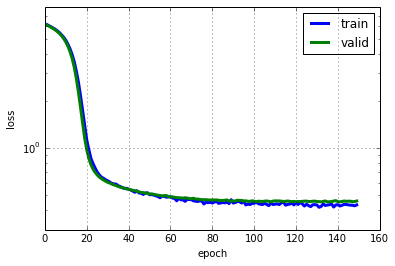

In [47]:
train_loss = np.array([i["train_loss"] for i in clf8.train_history_])
valid_loss = np.array([i["valid_loss"] for i in clf8.train_history_])
plt.plot(train_loss, linewidth=3, label="train")
plt.plot(valid_loss, linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
#plt.ylim(1e-1, 1e1)
plt.ylim(0.3, 8)
plt.yscale("log")
plt.show()

Plotting the results:  

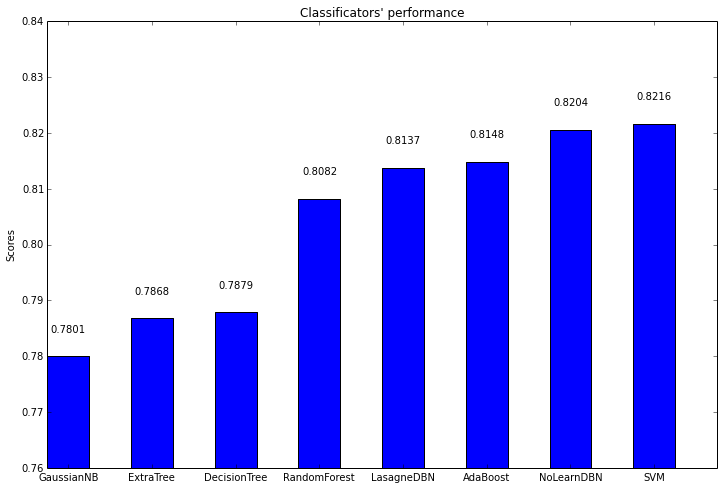

In [48]:
dic_results = {'SVM': eval1_cv,
               'RandomForest': eval2_cv,
               'DecisionTree': eval3_cv,
               'ExtraTree': eval4_cv,
               'AdaBoost': eval5_cv,
               'GaussianNB': eval6_cv,
               'NoLearnDBN': eval7_cv,
               'LasagneDBN': eval8_cv,
              }

import operator
tup_results = sorted(dic_results.items(), key=operator.itemgetter(1))

N = len(dic_results)
ind = np.arange(N)  # the x locations for the groups
width = 0.50       # the width of the bars

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
rects = ax.bar(ind, zip(*tup_results)[1], width,)
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2., 1.005*height, '{0:.4f}'.format(height), ha='center', va='bottom')

ax.set_ylabel('Scores')
ax.set_ylim(ymin=0.76,ymax = 0.84)
ax.set_title("Classificators' performance")
ax.set_xticks(ind + width/2.)
ax.set_xticklabels(zip(*tup_results)[0])

plt.show()

Choosing the best classifier and training with all training data:

In [49]:
# Fit the training data to the Survived labels and create the decision trees
clf = RandomForestClassifier(n_estimators = 100).fit(X_train,y_train)
# Take the same decision trees and run it on the test data

output = clf.predict(X_test)
print(output[10:20])

output_prob = clf.predict_proba(X_test)
print(output_prob[10:20])

[ 0.  0.  1.  0.  1.  1.  0.  0.  0.  0.]
[[ 0.76        0.24      ]
 [ 0.85933333  0.14066667]
 [ 0.03        0.97      ]
 [ 0.93        0.07      ]
 [ 0.03        0.97      ]
 [ 0.12166667  0.87833333]
 [ 0.9975      0.0025    ]
 [ 0.92        0.08      ]
 [ 0.8         0.2       ]
 [ 0.9         0.1       ]]


Runnng correlation hypothesis:

In [50]:
y = df_train2.Survived
X = df_train2.Gender
model = sm.Logit(y, X)
results = model.fit()
print results.summary()

Optimization terminated successfully.
         Current function value: 497.283121
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      890
Method:                           MLE   Df Model:                            0
Date:                Fri, 12 Jun 2015   Pseudo R-squ.:                  0.1619
Time:                        15:34:56   Log-Likelihood:                -497.28
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Gender        -1.4571      0.106    -13.701      0.000        -1.666    -1.249


In [51]:
y = df_train2.Survived
X = df_train2[['Gender','Pclass','AgeFill']]
model = sm.Logit(y, X)
results = model.fit()
print results.summary()

Optimization terminated successfully.
         Current function value: 471.937549
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Fri, 12 Jun 2015   Pseudo R-squ.:                  0.2046
Time:                        15:34:56   Log-Likelihood:                -471.94
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.910e-53
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Gender        -2.1764      0.170    -12.829      0.000        -2.509    -1.844
Pclass        -0.0671      